11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8756 - loss: 0.4265 - val_accuracy: 0.9642 - val_loss: 0.1170
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9663 - loss: 0.1089 - val_accuracy: 0.9693 - val_loss: 0.1063
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9763 - loss: 0.0738 - val_accuracy: 0.9765 - val_loss: 0.0718
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9833 - loss: 0.0540 - val_accuracy: 0.9746 - val_loss: 0.0788
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9858 - loss: 0.0428 - val_accuracy: 0.9764 - val_loss: 0.0843
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0984
Test Accuracy: 97.64%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


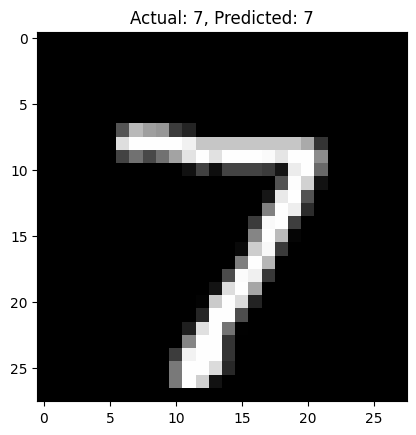

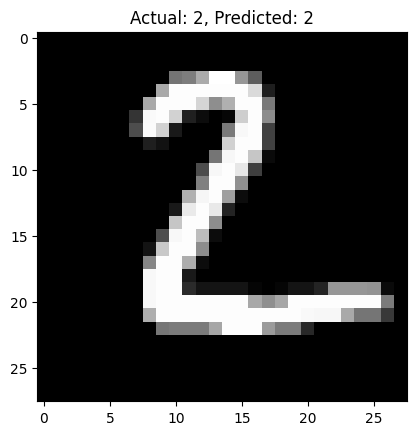

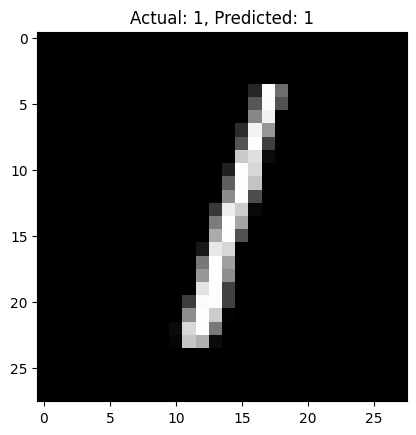

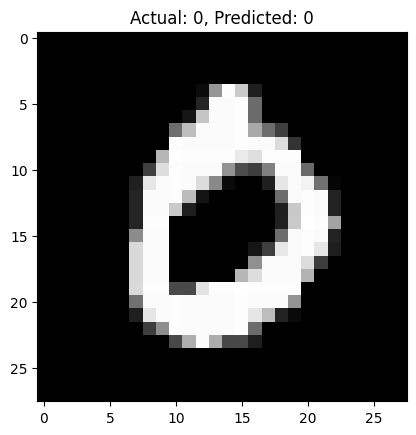

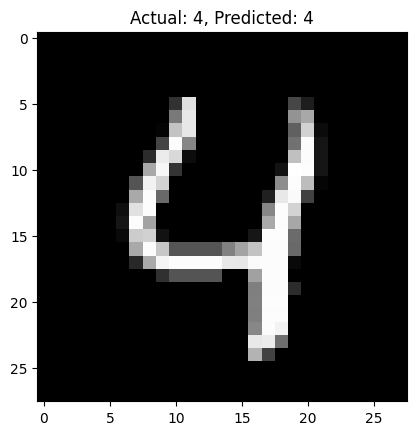

In [1]:
# Handwritten Digit Recognition using MNIST Dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(x_train, y_train_cat, epochs=5, validation_data=(x_test, y_test_cat))

# Evaluate
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predict and display
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Actual: {y_test[i]}, Predicted: {predictions[i].argmax()}")
    plt.show()
